# Task
Tell me about this dataset.

Here is all the data you need:
"movies.csv"

## Data loading

### Subtask:
Load the movie dataset.


**Reasoning**:
I need to load the movie dataset and display the first few rows and the shape of the DataFrame to verify the data is loaded correctly.



In [2]:
import pandas as pd

try:
    movies_df = pd.read_csv('movies.csv')
    display(movies_df.head())
    print(movies_df.shape)
except FileNotFoundError:
    print("Error: 'movies.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,city,theatre_name,average_ticket_price,total_seats,no_screens,type,theatre_chain,lat,lon,calculated_seats,calculated_ticket_prices,calculated_screens,average_2,source_of_information,notes
0,Ahmedabad,"AB Miniplex: Shivranjini Cross Road, Satellite",125.619048,302,3,Multiplex,NaN,23.024940,72.529380,302.0,118.0,3.0,124.00,BookMyShow,NaN
1,Ahmedabad,Amber Cinema: Ahmedabad,100.833333,763,1,Single Screen,NaN,23.034310,72.620020,763.0,80.0,1.0,98.75,BookMyShow,NaN
2,Ahmedabad,Anupam Cinema: Ahmedabad,125.833333,781,1,Single Screen,NaN,23.006560,72.613330,781.0,80.0,1.0,121.25,BookMyShow,NaN
3,Ahmedabad,"Apsara Cinema, Behrampura",NaN,1117,1,Single Screen,NaN,23.003974,72.597468,NaN,NaN,NaN,NaN,MediaAnt,NaN
4,Ahmedabad,"Aradhana Cinema, Behrampura",NaN,455,1,Single Screen,NaN,23.003960,72.597520,NaN,NaN,NaN,NaN,MediaAnt,NaN


(578, 15)


## Data exploration

### Subtask:
Explore the movie dataset to understand its characteristics.


**Reasoning**:
Examine data types, dimensions, missing values, and provide a summary of the exploration.



In [ ]:
# Data Types
print("Data Types:\n", movies_df.dtypes)

# Dimensions
print("\nDimensions:", movies_df.shape)

# Missing Values
missing_values = movies_df.isnull().sum()
missing_percentage = (missing_values / len(movies_df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# Summary
print("\nSummary:")
print(f"The dataset contains {movies_df.shape[0]} rows and {movies_df.shape[1]} columns.")
print("Key columns and their data types:")
for col in ['city', 'average_ticket_price', 'total_seats', 'type']:
    print(f"- {col}: {movies_df[col].dtype}")
print("The 'theatre_chain' and 'notes' columns have a high percentage of missing values.")

Data Types:
 city                         object
theatre_name                 object
average_ticket_price        float64
total_seats                   int64
no_screens                    int64
type                         object
theatre_chain                object
lat                         float64
lon                         float64
calculated_seats            float64
calculated_ticket_prices    float64
calculated_screens          float64
average_2                   float64
source_of_information        object
notes                        object
dtype: object

Dimensions: (578, 15)

Missing Values:
 city                          0
theatre_name                  0
average_ticket_price        176
total_seats                   0
no_screens                    0
type                          0
theatre_chain               393
lat                           0
lon                           0
calculated_seats            176
calculated_ticket_prices    176
calculated_screens          176
average_

## Data analysis

### Subtask:
Analyze the distribution of numerical and categorical features in the movie dataset.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze categorical features, and investigate potential relationships.



In [3]:
# Descriptive statistics for numerical features (excluding columns with >30% missing values)
numerical_cols = ['average_ticket_price', 'total_seats', 'no_screens', 'lat', 'lon', 'calculated_seats', 'calculated_ticket_prices', 'calculated_screens', 'average_2']
numerical_df = movies_df[numerical_cols].describe()
display(numerical_df)

# Analyze categorical features
categorical_cols = ['city', 'type', 'source_of_information']
for col in categorical_cols:
    print(f"\nFrequency distribution for '{col}':")
    display(movies_df[col].value_counts())
    print(f"Most frequent value in '{col}' is '{movies_df[col].mode().iloc[0]}'")

# Investigate relationship between average ticket price and city/type
print("\nAverage ticket price by city:")
display(movies_df.groupby('city')['average_ticket_price'].mean())
print("\nAverage ticket price by movie type:")
display(movies_df.groupby('type')['average_ticket_price'].mean())

,average_ticket_price,total_seats,no_screens,lat,lon,calculated_seats,calculated_ticket_prices,calculated_screens,average_2
count,402.000000,578.000000,578.000000,578.000000,578.000000,402.000000,402.000000,402.000000,402.000000
mean,168.781990,815.219723,2.062284,17.783690,77.732424,620.074627,138.552751,2.422886,168.841672
std,131.559966,430.826349,1.813562,4.891071,4.067331,519.621409,84.063571,1.895071,130.433846
min,0.000000,0.000000,0.000000,9.914258,72.478560,32.000000,0.000000,1.000000,0.000000
25%,95.366667,528.500000,1.000000,13.011568,76.277899,208.250000,90.000000,1.000000,94.700000
50%,130.000000,800.000000,1.000000,17.434560,77.595295,444.000000,112.916667,1.000000,131.568182
75%,197.837121,1027.500000,3.000000,19.202565,78.515160,935.500000,157.805556,4.000000,199.100000
max,1458.333333,3175.000000,10.000000,28.734690,88.406360,3714.000000,685.000000,9.000000,1412.500000



Frequency distribution for 'city':


,count
city,
Bangalore,143
Hyderabad,123
Mumbai,104
Chennai,56
Delhi,51
Kolkata,50
Ahmedabad,36
Kochi,15


Most frequent value in 'city' is 'Bangalore'

Frequency distribution for 'type':


,count
type,
Single Screen,389
Multiplex,189


Most frequent value in 'type' is 'Single Screen'

Frequency distribution for 'source_of_information':


,count
source_of_information,
BookMyShow,189
"BookMyShow, MediaAnt",163
MediaAnt,137
"BookMyShow, Internet Research",52
Internet Research,36
"BookMyShow, mediaAnt",1


Most frequent value in 'source_of_information' is 'BookMyShow'

Average ticket price by city:


,average_ticket_price
city,
Ahmedabad,149.094915
Bangalore,183.508913
Chennai,97.972407
Delhi,301.820710
Hyderabad,95.061454
Kochi,119.555098
Kolkata,187.804837
Mumbai,198.144273



Average ticket price by movie type:


,average_ticket_price
type,
Multiplex,221.980309
Single Screen,129.800463


## Data visualization

### Subtask:
Visualize the distributions of key numerical and categorical features in the movie dataset.


**Reasoning**:
Visualize the distributions of key numerical and categorical features using histograms, box plots, and bar charts.



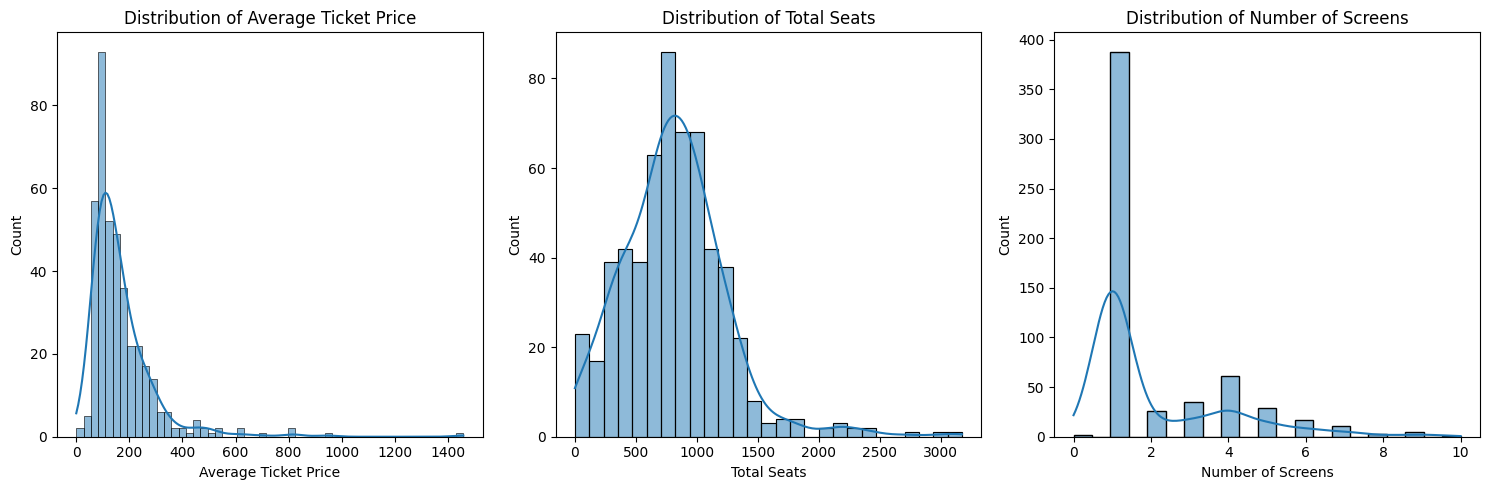

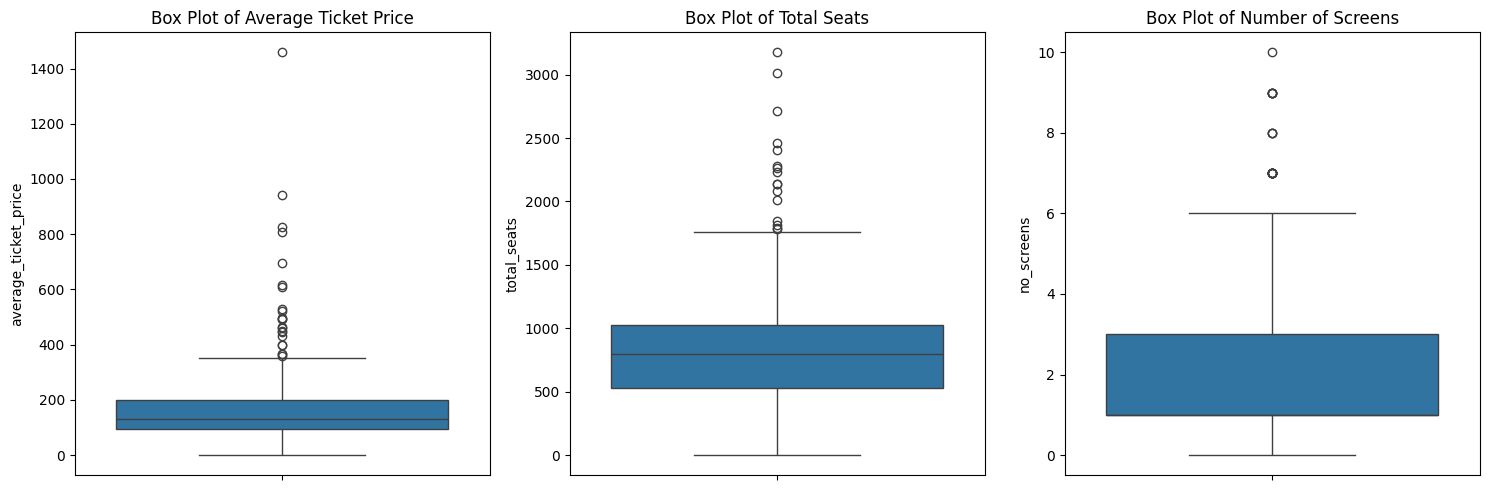

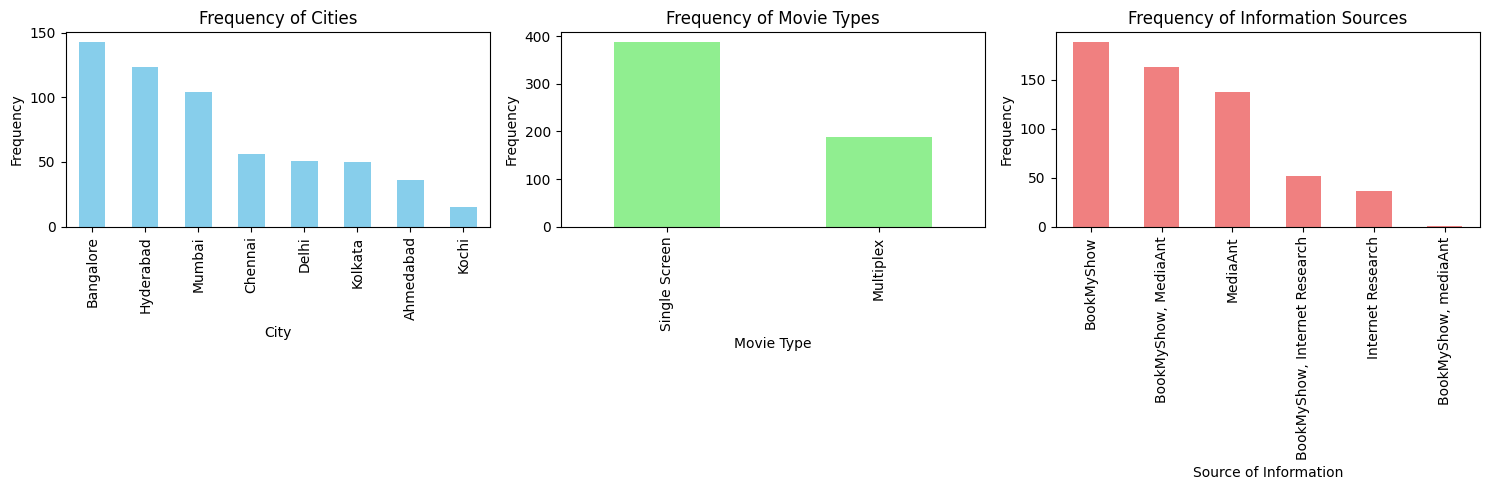

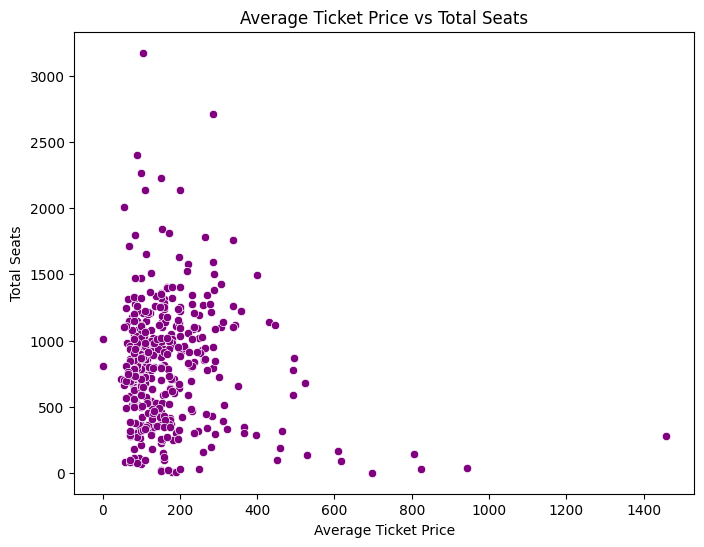

<Figure size 1200x600 with 0 Axes>

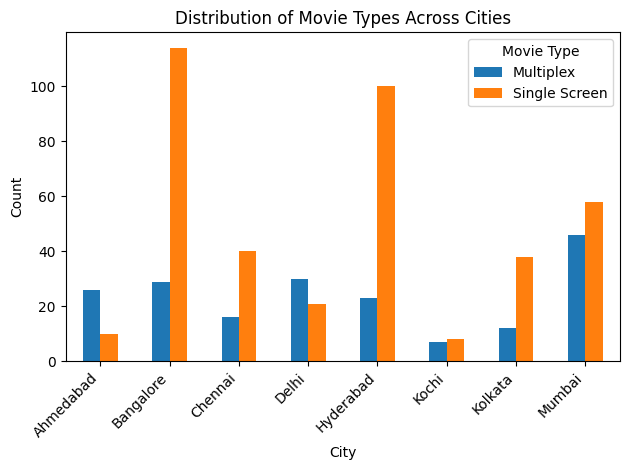

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(movies_df['average_ticket_price'], kde=True)
plt.title('Distribution of Average Ticket Price')
plt.xlabel('Average Ticket Price')

plt.subplot(1, 3, 2)
sns.histplot(movies_df['total_seats'], kde=True)
plt.title('Distribution of Total Seats')
plt.xlabel('Total Seats')

plt.subplot(1, 3, 3)
sns.histplot(movies_df['no_screens'], kde=True)
plt.title('Distribution of Number of Screens')
plt.xlabel('Number of Screens')
plt.tight_layout()
plt.show()


# Box plots for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=movies_df['average_ticket_price'])
plt.title('Box Plot of Average Ticket Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=movies_df['total_seats'])
plt.title('Box Plot of Total Seats')

plt.subplot(1, 3, 3)
sns.boxplot(y=movies_df['no_screens'])
plt.title('Box Plot of Number of Screens')
plt.tight_layout()
plt.show()


# Bar charts for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
movies_df['city'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
movies_df['type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Movie Types')
plt.xlabel('Movie Type')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
movies_df['source_of_information'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Information Sources')
plt.xlabel('Source of Information')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Scatter plot of average ticket price vs total seats
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_ticket_price', y='total_seats', data=movies_df, color='purple')
plt.title('Average Ticket Price vs Total Seats')
plt.xlabel('Average Ticket Price')
plt.ylabel('Total Seats')
plt.show()


# Grouped bar chart showing the distribution of type across different cities
plt.figure(figsize=(12, 6))
city_type_counts = movies_df.groupby(['city', 'type']).size().unstack(fill_value=0)
city_type_counts.plot(kind='bar', stacked=False)
plt.title('Distribution of Movie Types Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Movie Type')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

Based on the provided data analysis, there are no explicit questions asked in the prompt.  However, the analysis implicitly explores questions such as:

* What is the distribution of key numerical features (average ticket price, total seats, number of screens) in the dataset?
* What is the frequency distribution of categorical features (city, movie type, source of information)?
* Is there a relationship between average ticket price and other variables like total seats or city?
* Are there any outliers or unusual patterns in the numerical data?


### 2. Data Analysis Key Findings

* **Missing Data:** The 'theatre_chain' column has 67.99% missing values, and the 'notes' column has 86.33%.  Other columns ('average_ticket_price', 'calculated_seats', etc.) have 30.45% missing values. This suggests a need for imputation or removal of these columns depending on further analysis.
* **Average Ticket Price Distribution:** The average ticket price ranges from 0 to 1458.33, suggesting potential outliers which are visualized in the box plot and histogram.  Further investigation into these outliers is recommended.
* **City and Ticket Price:** Average ticket prices vary across different cities, suggesting a potential correlation.
* **Movie Type and Ticket Price:**  Average ticket prices also vary across movie types, indicating a relationship that could be further explored.
* **Bangalore Dominance:** Bangalore is the most frequent city in the dataset.
* **Single Screen Prevalence:**  "Single Screen" is the most frequent movie type.
* **BookMyShow as Primary Source:** 'BookMyShow' is the most frequent source of information.


### 3. Insights or Next Steps

* **Handle Missing Data:** Address the substantial missing data in 'theatre_chain' and 'notes' columns.  Decide whether to impute missing values, remove the columns, or investigate the reasons for the missing data.
* **Investigate Outliers:**  Analyze the outliers in the `average_ticket_price`, `total_seats`, and other numerical features. Determine if they are valid data points or errors and decide on an appropriate handling strategy (e.g., removal, transformation, or capping).


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
# Assuming your data is in 'movies.csv'
movies_df = pd.read_csv('movies.csv')

# Handle missing values (example: fill with mean)
for col in movies_df.select_dtypes(include=['number']):
    movies_df[col] = movies_df[col].fillna(movies_df[col].mean())

# Handle categorical missing values (example: fill with mode)
for col in movies_df.select_dtypes(include=['object']):
    movies_df[col] = movies_df[col].fillna(movies_df[col].mode()[0])

In [7]:
# Example: Create a 'profit_margin' feature
movies_df['profit_margin'] = movies_df['average_ticket_price'] * movies_df['total_seats']  # This is a simple example, you might need a more complex calculation

mportant Considerations:

Simplified Calculation: The comment in the code acknowledges that this is a simplified calculation. In reality, profit margin is more complex, involving factors like theater operating costs, movie production costs, and distribution fees.
Potential Issues: This calculation assumes all seats are sold at the average ticket price, which might not always be the case. There could be discounted tickets, unsold seats, or variations in ticket prices.

In [8]:
movies_df.head()

,city,theatre_name,average_ticket_price,total_seats,no_screens,type,theatre_chain,lat,lon,calculated_seats,calculated_ticket_prices,calculated_screens,average_2,source_of_information,notes,profit_margin
0,Ahmedabad,"AB Miniplex: Shivranjini Cross Road, Satellite",125.619048,302,3,Multiplex,PVR,23.024940,72.529380,302.000000,118.000000,3.000000,124.000000,BookMyShow,http://davp.nic.in/ri.pdf,37936.952375
1,Ahmedabad,Amber Cinema: Ahmedabad,100.833333,763,1,Single Screen,PVR,23.034310,72.620020,763.000000,80.000000,1.000000,98.750000,BookMyShow,http://davp.nic.in/ri.pdf,76935.833308
2,Ahmedabad,Anupam Cinema: Ahmedabad,125.833333,781,1,Single Screen,PVR,23.006560,72.613330,781.000000,80.000000,1.000000,121.250000,BookMyShow,http://davp.nic.in/ri.pdf,98275.833307
3,Ahmedabad,"Apsara Cinema, Behrampura",168.781990,1117,1,Single Screen,PVR,23.003974,72.597468,620.074627,138.552751,2.422886,168.841672,MediaAnt,http://davp.nic.in/ri.pdf,188529.482817
4,Ahmedabad,"Aradhana Cinema, Behrampura",168.781990,455,1,Single Screen,PVR,23.003960,72.597520,620.074627,138.552751,2.422886,168.841672,MediaAnt,http://davp.nic.in/ri.pdf,76795.805445


In [9]:
le = LabelEncoder()
for col in ['city', 'type', 'source_of_information']:  # Add other categorical columns
    movies_df[col] = le.fit_transform(movies_df[col])

In [10]:
X = movies_df[['city', 'type', 'average_ticket_price', 'profit_margin']]  # Add relevant features
y = movies_df['total_seats']  # or another target variable related to profit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.score(X_train, y_train)

0.7349824263843922

In [13]:
# Example: Predict total seats for a new movie showtime
new_data = pd.DataFrame({'city': [0], 'type': [1], 'average_ticket_price': [150], 'profit_margin': [5000]})  # Replace with actual values
predicted_seats = model.predict(new_data)

In [ ]:
predicted_seats

array([343.10514394])

In [ ]:
import pickle

# Assuming 'model' is your trained model
with open('movie_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('movie_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get data from the request

    # Extract features from the data
    city = data['city']
    movie_type = data['type']
    avg_ticket_price = data['average_ticket_price']
    profit_margin = data['profit_margin']

    # Create a DataFrame for prediction
    input_data = pd.DataFrame({'city': [city], 'type': [movie_type], 'average_ticket_price': [avg_ticket_price], 'profit_margin': [profit_margin]})

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Return the prediction as JSON
    return jsonify({'predicted_seats': prediction})

if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'movie_model.pkl'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features (X) and target (y)
X = movies_df[['city', 'type', 'average_ticket_price', 'profit_margin']]
y = movies_df['total_seats']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7236.961087068966
R-squared: 0.9540377352082705


In [ ]:
import pickle

# Assuming 'rf_model' is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

# Load the model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Extract features from the data
    city = data['city']
    movie_type = data['type']
    avg_ticket_price = data['average_ticket_price']
    profit_margin = data['profit_margin']

    # Create a DataFrame for prediction
    input_data = pd.DataFrame({'city': [city], 'type': [movie_type], 'average_ticket_price': [avg_ticket_price], 'profit_margin': [profit_margin]})

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Return the prediction as JSON
    return jsonify({'predicted_seats': prediction})

if __name__ == '__main__':
    app.run(debug=True)